In [108]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys

In [109]:
directory='/usr/sci/cedmav/hello/nasa-atmosphere/'

In [127]:
all_files=[]
for files in os.listdir(directory):
    all_files.append(files)
all_files.sort()

file_dir=os.path.join(directory,all_files[0])
data=xr.open_dataset(file_dir)
data

<xarray.Dataset>
Dimensions:  (lon: 1440, lat: 8640, lev: 52, time: 1)
Coordinates:
  * lon      (lon) float64 305.0 305.1 305.1 305.2 ... 34.82 34.87 34.92 34.97
  * lat      (lat) float64 -35.25 -35.2 -35.15 -35.11 ... -35.34 -35.31 -35.29
  * lev      (lev) float64 21.0 22.0 23.0 24.0 25.0 ... 68.0 69.0 70.0 71.0 72.0
  * time     (time) datetime64[ns] 2020-01-23T22:00:00
Data variables:
    U        (time, lev, lat, lon) float32 ...
Attributes:
    History:      File written by MAPL_CFIO
    Source:       Heracles-5_3
    Title:        3d,1-Hourrly,Instantaneous,Cubed-Sphere on Model-Level,Mode...
    Contact:      http://gmao.gsfc.nasa.gov
    Conventions:  COARDS
    Institution:  NASA Global Modeling and Assimilation Office
    References:   http://gmao.gsfc.nasa.gov
    Comment:      DYAMOND_c1440_llc2160

In [128]:
sel_data=data.isel(lev=0,lat=slice(7200,8640))
sel_data.U

<xarray.DataArray 'U' (time: 1, lat: 1440, lon: 1440)>
[2073600 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 305.0 305.1 305.1 305.2 ... 34.82 34.87 34.92 34.97
  * lat      (lat) float64 -35.29 -35.31 -35.34 -35.36 ... -35.34 -35.31 -35.29
    lev      float64 21.0
  * time     (time) datetime64[ns] 2020-01-23T22:00:00
Attributes:
    long_name:       eastward_wind
    units:           m s-1
    fmissing_value:  1000000000000000.0
    standard_name:   eastward_wind
    vmin:            -1000000000000000.0
    vmax:            1000000000000000.0
    valid_range:     [-1.e+15  1.e+15]

In [129]:
def visualize(data,cmap=None):
    fig=plt.figure(figsize = (15,15))        
    plot = plt.imshow(data, origin='lower', cmap=cmap, aspect='auto')
    plt.show()
    return plot
    
    

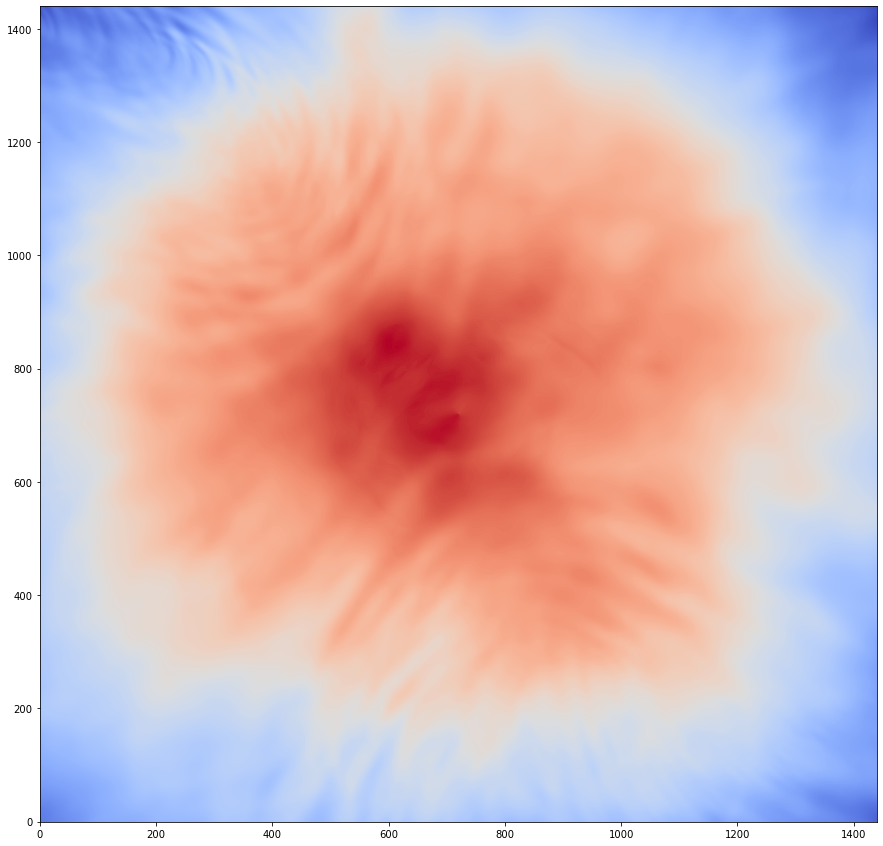

In [130]:
visualize(sel_data.U[0,:,:].values,cmap='coolwarm')

In [131]:
file_dir='/hdscratch/converted_raw_files/DYAMOND_c1440_llc2160.inst_01hr_3d_U_Mv.20200123_2300z/'

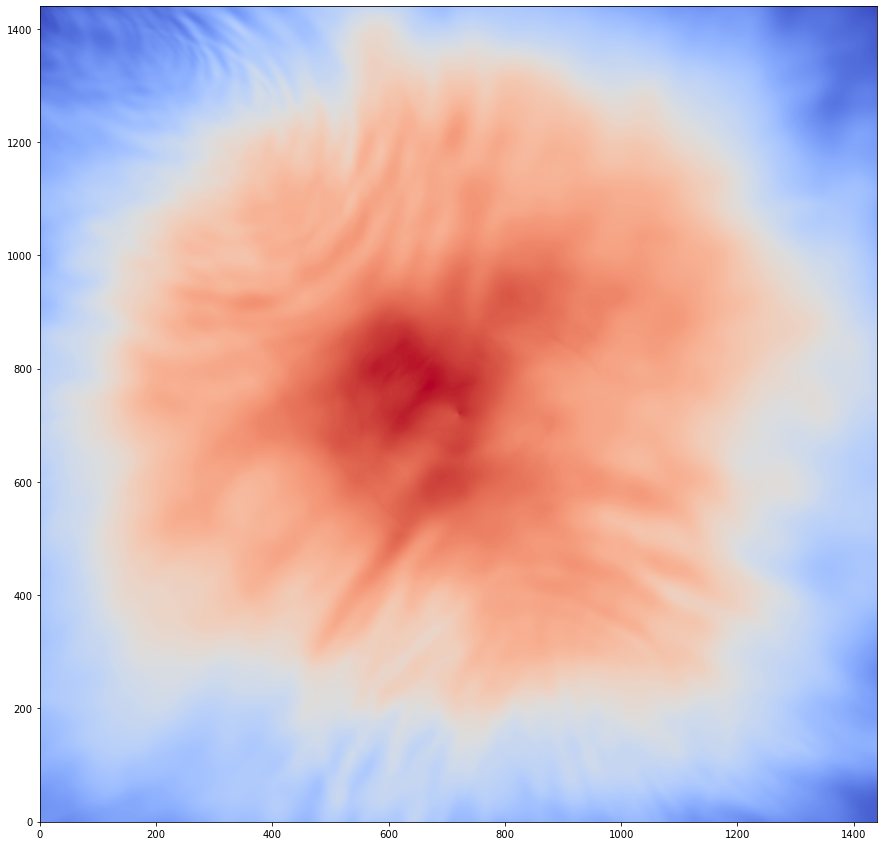

In [132]:
a=[]
for files in os.listdir(file_dir):
    a.append(files)
a.sort()
path=os.path.join(file_dir,'lev_0_face_5.raw')
# path
with open(path,'rb') as f:
    cont=f.read()
    
    data=np.frombuffer(cont, dtype='float32')
    data=data.reshape(1440,1440)
    visualize(data,cmap='coolwarm')